✅ Data loaded
X shape: (2750, 620)
y shape: (2750,)
Number of unique classes: 11
Classes: [ 0  4  3  9  5  7 10  6  1  8  2]


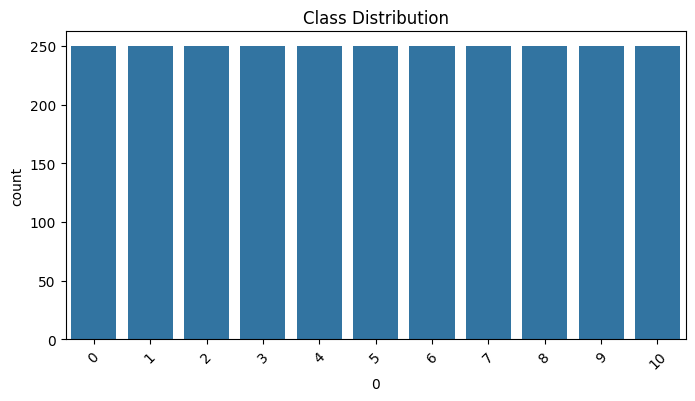

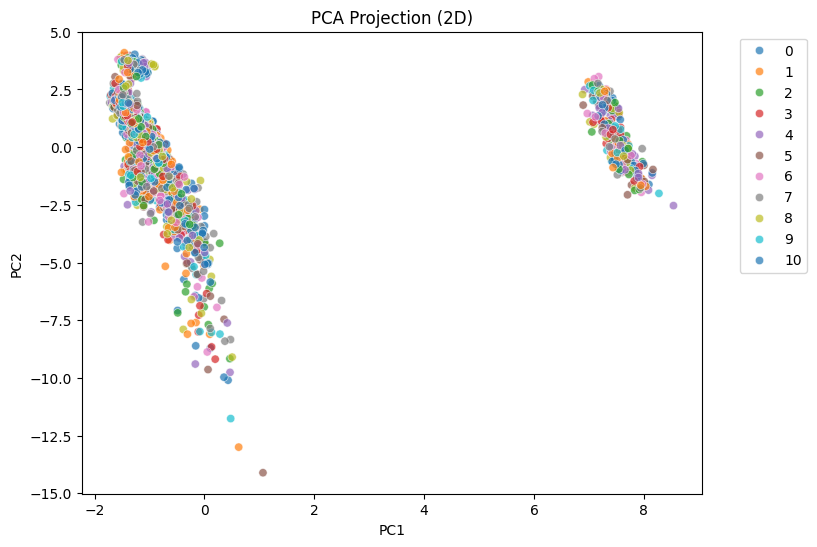

In [ ]:
# =========================
# EEG Data Exploration Notebook
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# === Load Data ===
X = pd.read_csv("../processed_data/X.csv")
y = pd.read_csv("../processed_data/y.csv").squeeze()  # Series

print("✅ Data loaded")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of unique classes: {y.nunique()}")
print(f"Classes: {y.unique()}")

# === Class distribution ===
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

# === Missing values check ===
missing_perc = (X.isnull().sum() / len(X)) * 100
print("\n📊 Missing values (%):\n", missing_perc[missing_perc > 0])

# === Feature statistics ===
means = X.mean(axis=0)
stds = X.std(axis=0)
print("\n📈 Global feature means (first 5):\n", means.head())
print("\n📉 Global feature stds (first 5):\n", stds.head())

# === Per-class means (first 5 features) ===
class_means = X.groupby(y).mean().iloc[:, :5]
print("\n🏷 Per-class mean (first 5 features):\n", class_means)

# === Correlation heatmap (first 20 features to avoid overload) ===
plt.figure(figsize=(10, 8))
sns.heatmap(X.iloc[:, :20].corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation (first 20 features)")
plt.show()

# === PCA Visualization (2D) ===
pca_2d = PCA(n_components=2, random_state=42)
X_pca = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# === PCA Variance Explained ===
pca_full = PCA()
pca_full.fit(X)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# === Top contributing features for PC1 & PC2 ===
loading_matrix = pd.DataFrame(
    pca_2d.components_, 
    columns=X.columns, 
    index=['PC1', 'PC2']
)

top_pc1 = loading_matrix.loc['PC1'].abs().sort_values(ascending=False).head(10)
top_pc2 = loading_matrix.loc['PC2'].abs().sort_values(ascending=False).head(10)

print("\n🔝 Top 10 contributing features to PC1:\n", top_pc1)
print("\n🔝 Top 10 contributing features to PC2:\n", top_pc2)
